<a href="https://colab.research.google.com/github/NathanLCR/quarentenadados-alura/blob/master/QuarentenaDados_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
filmes.columns = ["filmeId","titulo","generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
avaliacoes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv")
avaliacoes.columns = ["usuarioId","filmeId","nota","momento"]
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
notas_medias_filme = avaliacoes.groupby("filmeId")["nota"].mean()
notas_medias_filme.head()


filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [0]:
filmes_com_nota = filmes.join(notas_medias_filme,on="filmeId")
filmes_com_nota.head()

,filmeId,titulo,generos,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


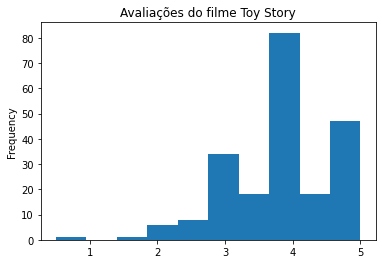

In [0]:
avaliacoes.query("filmeId == 1")["nota"].plot(kind='hist')
plt.title("Avaliações do filme Toy Story")
plt.show()

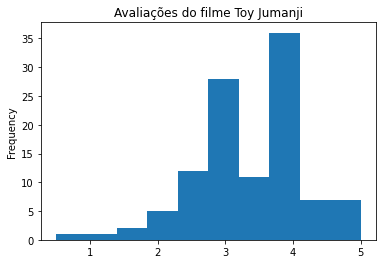

In [0]:
avaliacoes.query("filmeId == 2")["nota"].plot(kind='hist',
                                              title="Avaliações do filme Toy Jumanji")

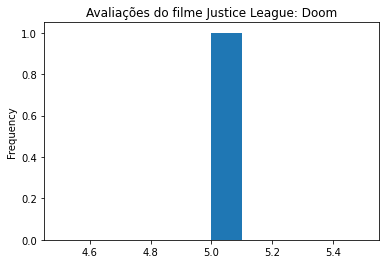

In [0]:
avaliacoes.query("filmeId == 102084")["nota"].plot(kind='hist',
                                                   title="Avaliações do filme Justice League: Doom")

## Desafio 1 do [Paulo Silveira](https://twitter.com/paulo_caelum)

O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes.

In [0]:
filmes_com_nota['nota'].isnull().sum()

18

In [0]:
filmes_com_nota[filmes_com_nota["nota"].isnull()]

,filmeId,titulo,generos,nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


## Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Mudar o nome da coluna nota do dataframe **filmes_com_media** para nota_média após o join.

In [0]:
filmes_com_nota.rename(columns={"nota":"nota_media"}, inplace=True)
filmes_com_nota.head()

,filmeId,titulo,generos,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


## Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [0]:
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [0]:
contador_notas_por_filme = avaliacoes.groupby('filmeId')["nota"].count()

In [0]:
filmes_com_nota = filmes_com_nota.join(contador_notas_por_filme,on="filmeId")
filmes_com_nota.rename(columns={"nota":"quantidade_votos"}, inplace=True)
filmes_com_nota.head()

,filmeId,titulo,generos,nota_media,quantidade_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


## Desafio 4 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Arredondar as médias (coluna de nota média) para duas casas decimais.

In [0]:
filmes_com_nota = filmes_com_nota.round({'nota_media': 2,"quantidade_votos":0})
filmes_com_nota.head()

,filmeId,titulo,generos,nota_media,quantidade_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)


In [0]:
generos_ = filmes_com_nota["generos"]

In [0]:
generos_ = generos_.str.split('|')

In [0]:
slist =[]
for x in generos_:
    slist.extend(x)

In [0]:
generos_com_repeticao = pd.DataFrame(slist)
generos_com_repeticao.columns = ["genero"]

In [0]:
generos = generos_com_repeticao.drop_duplicates().reset_index().drop(['index'],axis=1)
generos

,genero
0,Adventure
1,Animation
2,Children
3,Comedy
4,Fantasy
5,Romance
6,Drama
7,Action
8,Crime
9,Thriller


## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Contar o número de aparições de cada genero.

In [0]:
generos_quantidade = generos_com_repeticao.stack().value_counts()
generos_quantidade

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

## Desafio 7 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

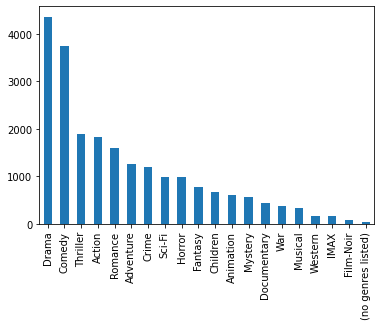

In [0]:
generos_quantidade.plot(kind="bar")